In [ ]:
# Milestone 4 (Time Series Forecasting)

Name : Rinashini a/p Arunasalam Sukormaru  
Matric ID : WQD170077 (17013672/1)    
Github Link :  https://github.com/RinashiniA/WQD7005-Group

In [1]:
# Importing libraries 

import matplotlib
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


In [2]:
# Getting the cleaned Crudeoil Price dataset

df = pd.read_csv(r'dataset_cleaned.csv',
                 index_col=['Date'])
print(df)

            Closing Price   Open  Daily High  Daily Low
Date                                                   
29/05/2020          35.49  33.68       35.77      32.36
28/05/2020          33.71  32.10       34.21      31.14
27/05/2020          32.81  34.14       34.32      31.75
26/05/2020          34.35  33.30       34.81      32.48
22/05/2020          33.25  33.95       34.00      30.72
...                   ...    ...         ...        ...
09/02/2006          62.62  62.68       63.73      62.38
08/02/2006          62.55  62.96       63.44      62.29
07/02/2006          63.09  64.82       64.90      62.81
06/02/2006          65.11  66.35       66.50      64.77
03/02/2006          65.37  64.77       65.48      63.93

[3669 rows x 4 columns]


In [3]:
# Obtaining information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3669 entries, 29/05/2020 to 03/02/2006
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  3669 non-null   float64
 1   Open           3669 non-null   float64
 2   Daily High     3669 non-null   float64
 3   Daily Low      3669 non-null   float64
dtypes: float64(4)
memory usage: 143.3+ KB


In [4]:
#Removing the blank spaces between column names so that they can be called easily 

df.columns = df.columns.str.strip().str.replace(" ", "").str.lstrip()
print(df.columns.values)

['ClosingPrice' 'Open' 'DailyHigh' 'DailyLow']


In [5]:
# Choosing the closing price column for time series analysis

df1 = df[['ClosingPrice']]
print(df1)

            ClosingPrice
Date                    
29/05/2020         35.49
28/05/2020         33.71
27/05/2020         32.81
26/05/2020         34.35
22/05/2020         33.25
...                  ...
09/02/2006         62.62
08/02/2006         62.55
07/02/2006         63.09
06/02/2006         65.11
03/02/2006         65.37

[3669 rows x 1 columns]


In [6]:
# Reindexing the dataset to reverse the order of the data from the latest price at the top of the dataset to the oldest price at the top of the dataset 

df2 = df1.iloc[::-1]
print(df2.head(20))

            ClosingPrice
Date                    
03/02/2006         65.37
06/02/2006         65.11
07/02/2006         63.09
08/02/2006         62.55
09/02/2006         62.62
10/02/2006         61.84
13/02/2006         61.24
14/02/2006         59.57
15/02/2006         57.65
16/02/2006         58.46
17/02/2006         59.88
20/02/2006         62.77
21/02/2006         62.74
22/02/2006         61.01
23/02/2006         60.54
24/02/2006         62.91
27/02/2006         61.00
28/02/2006         61.41
01/03/2006         61.97
02/03/2006         63.36


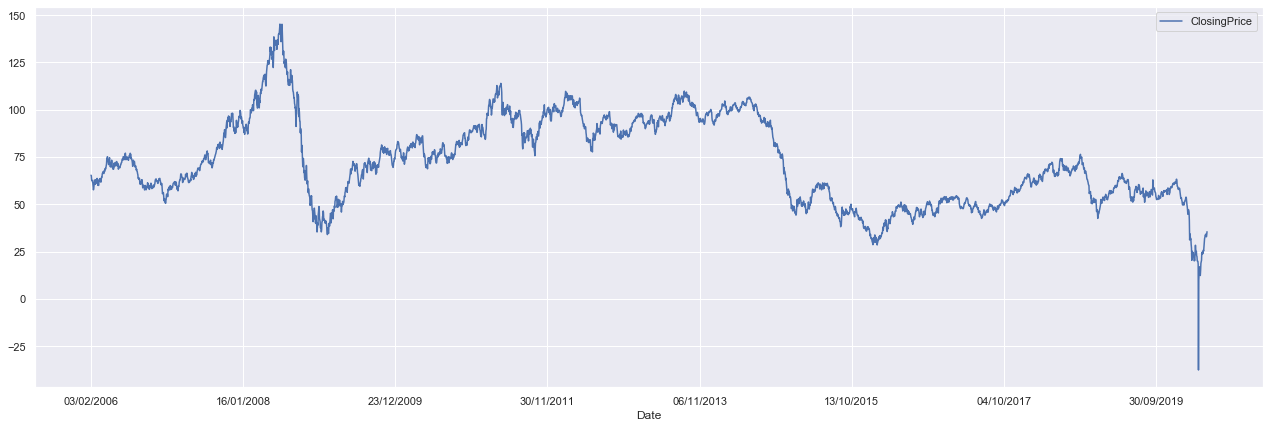

In [7]:
# Plotting the graph of WTI crude oil prices from 03/02/2006 until 29/05/2020

sns.set(rc={'figure.figsize':(22, 7)})
df2.plot()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

                             ARIMA Model Results                              
Dep. Variable:        D2.ClosingPrice   No. Observations:                 3667
Model:                ARIMA(2, 2, 10)   Log Likelihood               -7577.294
Method:                       css-mle   S.D. of innovations              1.909
Date:                Wed, 17 Jun 2020   AIC                          15182.588
Time:                        14:21:20   BIC                          15269.488
Sample:                             2   HQIC                         15213.528
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.975e-05   2.58e-05     -0.766      0.444   -7.03e-05    3.08e-05
ar.L1.D2.ClosingPrice      0.3554        nan        nan        nan         nan         nan
ar.L

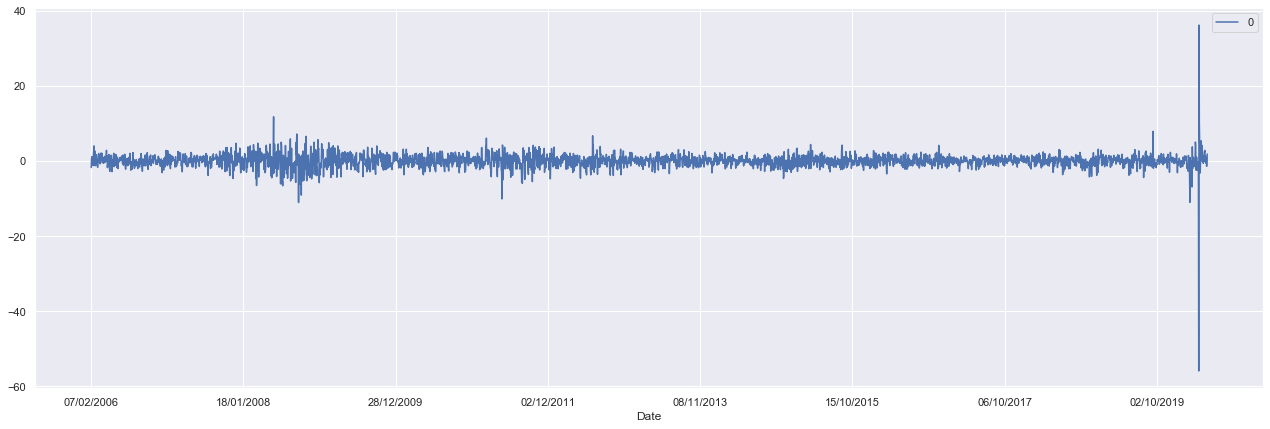

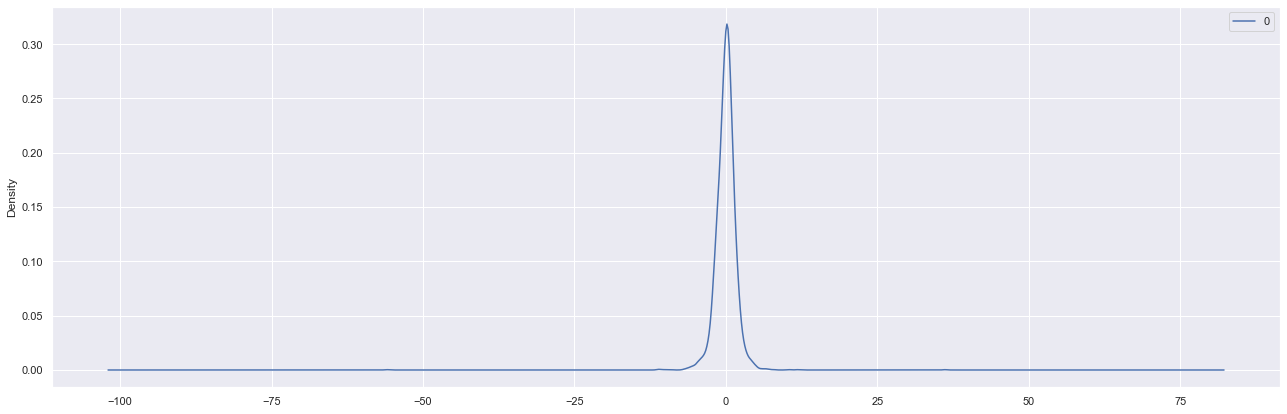

                 0
count  3667.000000
mean      0.003777
std       1.909930
min     -55.929231
25%      -0.818301
50%       0.085405
75%       0.855806
max      36.177291


In [8]:
# Fitting the dataset into Arima(2,2,10) model. 
# This sets the lag value to 2 for autoregression, uses a difference order of 2 to make the time series stationary, and uses a moving average model of 10.

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df2['ClosingPrice'], order=(2,2,10))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors

residuals = DataFrame(model_fit.resid)
print(residuals)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

The distribution of the residual errors is displayed. The results show that there is limited bias in the prediction (approximately zero mean value in the residuals).

In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(df2['ClosingPrice'], order=(2, 2, 10))  
results_ARIMA = model.fit(disp=-1)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWar

In [10]:
arima_pred = results_ARIMA.predict(df2['ClosingPrice'].index[3000], df2['ClosingPrice'].index[-1], typ="levels")

Text(0.5, 1.0, 'RMSE: 2.9446')

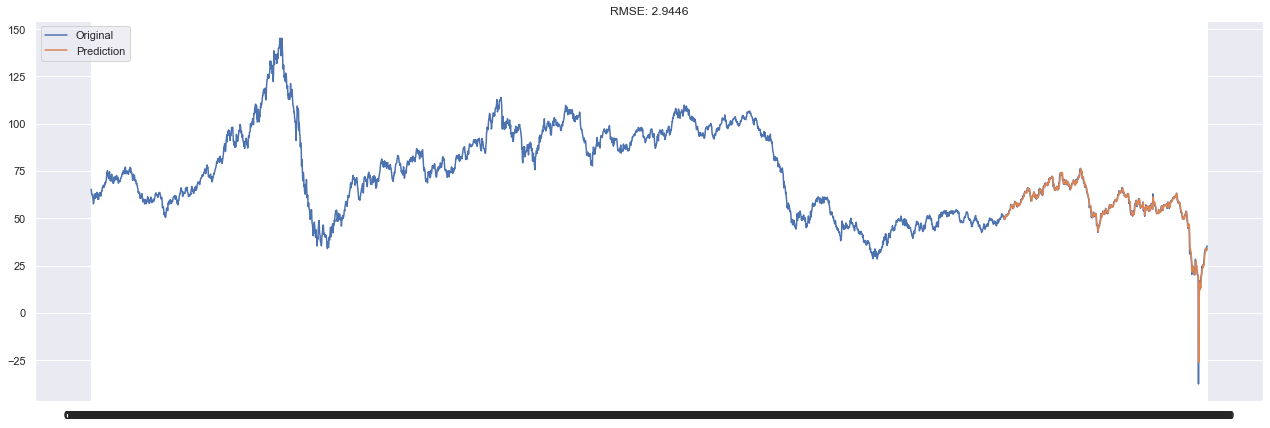

In [11]:
plt.plot(df2['ClosingPrice'], label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred-df2.ClosingPrice[3000:])**2)/len(df2.ClosingPrice[3000:])))

In [13]:
# Accuracy metrics for overall ARIMA Time Series Forecasting Model

## Mean Absolute Percentage Error (MAPE)
## Mean Error (ME)
## Mean Absolute Error (MAE)
## Mean Percentage Error (MPE)
## Root Mean Squared Error (RMSE)
## Correlation between the Actual and the Forecast (corr)
## Min-Max Error (minmax)

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(arima_pred, df2.ClosingPrice[3000:])

{'mape': 0.028931008740698802,
 'me': -0.014264406061127088,
 'mae': 1.0955971718904844,
 'mpe': -0.009067680055309172,
 'rmse': 2.9446097770535267,
 'corr': 0.9719284741359818,
 'minmax': 0.030594148811295296}

A Mean Absolute Percentage Error (MAPE) of 0.0289 means that this ARIMA time series forecasting model has an accuracy of approximately 97.11% in predicting the next 669 observations.

Recent Predictions (for the year of 2020)

In [14]:
arima_pred_2020 = results_ARIMA.predict(df2['ClosingPrice'].index[3566], df2['ClosingPrice'].index[-1], typ="levels")

Text(0.5, 1.0, 'RMSE: 6.9941')

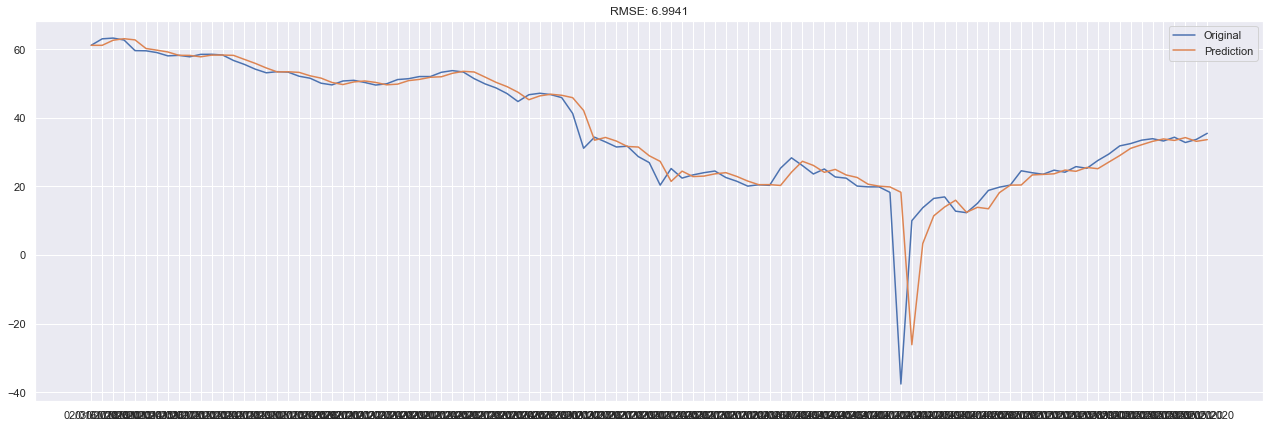

In [15]:
plt.plot(df2.ClosingPrice[3566:], label='Original')
plt.plot(arima_pred_2020, label='Prediction')
plt.legend(loc=1)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred_2020-df2.ClosingPrice[3566:])**2)/len(df2.ClosingPrice[3566:])))

In [16]:
# Accuracy metrics for ARIMA time series forecasting model for the year 2020

forecast_accuracy(arima_pred_2020, df2.ClosingPrice[3566:])

{'mape': 0.10944525963154746,
 'me': 0.25144724237308513,
 'mae': 2.4706601146387994,
 'mpe': -0.05418044422655465,
 'rmse': 6.994126472937059,
 'corr': 0.9147084710463056,
 'minmax': 0.12134490016500876}

The Mean Absolute Percentage Error (MAPE) of 0.1094 means that this ARIMA time series forecasting model for the year 2020 has an accuracy of approximately 89.06% in predicting the next 103 observations.

Recent Predictions (for the month of April 2020)

In [17]:
arima_pred_April = results_ARIMA.predict(df2['ClosingPrice'].index[3628], df2['ClosingPrice'].index[-22], typ="levels")

Text(0.5, 1.0, 'RMSE: 15.2619')

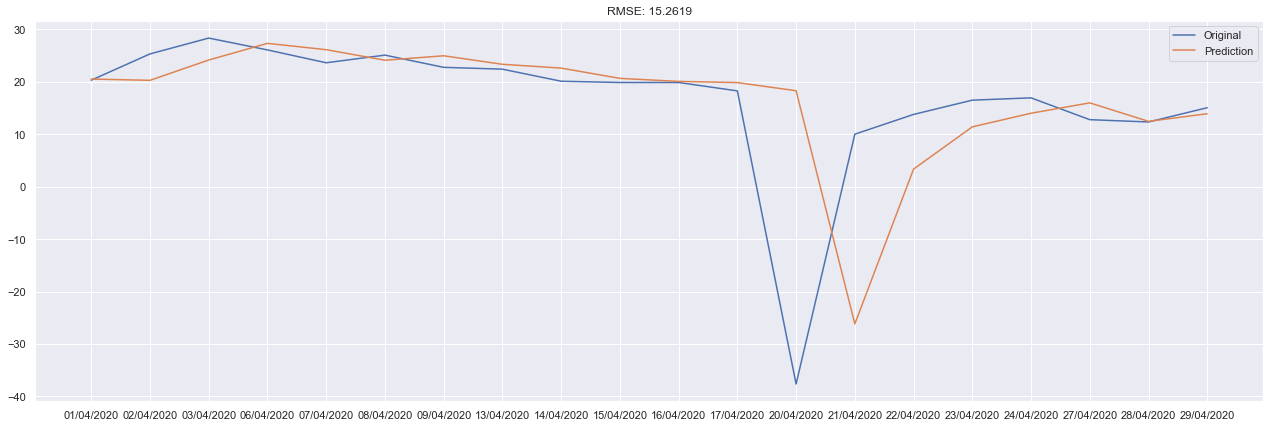

In [18]:
plt.plot(df2.ClosingPrice[3628:3648], label='Original')
plt.plot(arima_pred_April, label='Prediction')
plt.legend(loc=1)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred_April-df2.ClosingPrice[3628:3648])**2)/len(df2.ClosingPrice[3628:3648])))

In [19]:
# Accuracy metrics for ARIMA time series forecasting model for the month of April 2020

forecast_accuracy(arima_pred_April, df2.ClosingPrice[3628:3648])

{'mape': 0.38122129642575187,
 'me': 0.2728831943590796,
 'mae': 6.870153135750627,
 'mpe': -0.29882022348400883,
 'rmse': 15.26191415735579,
 'corr': 0.24932432294534335,
 'minmax': 0.45496525712496005}

The Mean Absolute Percentage Error (MAPE) of 0.3812 means that this ARIMA time series forecasting model for the month of April 2020 has an accuracy of approximately 61.88% in predicting 21 observations between the end of Mac 2020 and beginning of May 2020.  
  
In this model predicted for the month of April 2020, we can observe a lower accuracy in forecasting with 61.88% as compared to the accuracy level of the overall prediction model with 97.11% due to the sudden sharp collapse in oil demand in mid-April 2020 leaving the global market oversupplied with more than enough crude oil. The lack of oil demand is due to most countries experiencing lockdowns to overcome the Covid-19 outbreak. This then caused the price of the WTI crude oil to drop to levels of negative as shown in the plot as above.

Recent Predictions (for the month of May 2020)

In [20]:
arima_pred_May = results_ARIMA.predict(df2['ClosingPrice'].index[3649], df2['ClosingPrice'].index[-1], typ="levels")

Text(0.5, 1.0, 'RMSE: 1.6436')

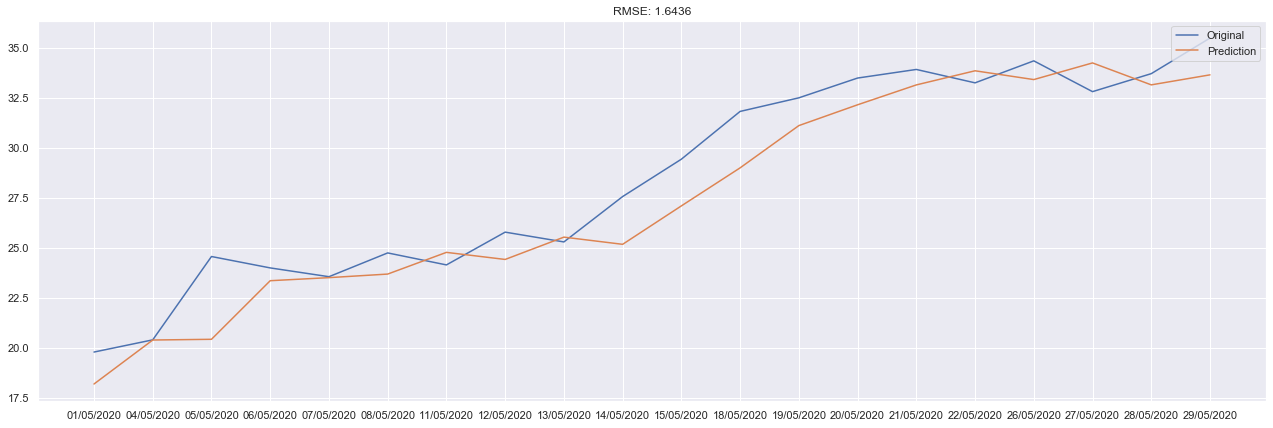

In [21]:
plt.plot(df2.ClosingPrice[3649:], label='Original')
plt.plot(arima_pred_May, label='Prediction')
plt.legend(loc=1)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred_May-df2.ClosingPrice[3649:])**2)/len(df2.ClosingPrice[3649:])))

In [22]:
# Accuracy metrics for ARIMA time series forecasting model for the month of May 2020

forecast_accuracy(arima_pred_May, df2.ClosingPrice[3649:])

{'mape': 0.04639241644392671,
 'me': -1.0170999384358732,
 'mae': 1.3078302727395044,
 'mpe': -0.03665137615518109,
 'rmse': 1.6436342660705818,
 'corr': 0.9674922560498354,
 'minmax': 0.046247022714284824}

The Mean Absolute Percentage Error (MAPE) of 0.0464 means that this ARIMA time series forecasting model for the month of May 2020 has an accuracy of approximately 95.36% in predicting the final 21 observations in the month of May 2020.

While in the month of May 2020, we can observe a more stable increase in the price of WTI crude oil per barrel as countries are moving from tighter lockdowns to looser lockdowns due to most countries having reduced rise in the number of daily Covid-19 cases. Hence, the prediction of WTI crude oil price for the month of May 2020 is more stable with 95.36% accuracy as there isn't sudden external parameters affecting the price of WTI crude oil. 